In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitter_training.csv')

In [3]:
df = df.drop(columns = '2401')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Borderlands                                            74681 non-null  object
 1   Positive                                               74681 non-null  object
 2   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df.dropna(subset=['Borderlands'], inplace=True)
df.dropna(subset=['Positive'], inplace=True)
df.dropna(subset=['im getting on borderlands and i will murder you all ,'], inplace=True)

In [6]:
df = df.drop(columns = 'Borderlands')

In [7]:
X = df.drop(columns = 'Positive')

In [8]:
Y = df['Positive']

In [9]:
Y.shape

(73995,)

In [10]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer



In [11]:
stopwords = nltk.corpus.stopwords.words('English')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    token = re.split('/W+', text)
    #text = [ps.stem(word) for word in token if word not in stopwords]
    return token


In [12]:
df['clean'] = df['im getting on borderlands and i will murder you all ,'].apply(lambda x: x.split(" "))

In [13]:
df['clean']

0        [I, am, coming, to, the, borders, and, I, will...
1        [im, getting, on, borderlands, and, i, will, k...
2        [im, coming, on, borderlands, and, i, will, mu...
3        [im, getting, on, borderlands, 2, and, i, will...
4        [im, getting, into, borderlands, and, i, can, ...
                               ...                        
74676    [Just, realized, that, the, Windows, partition...
74677    [Just, realized, that, my, Mac, window, partit...
74678    [Just, realized, the, windows, partition, of, ...
74679    [Just, realized, between, the, windows, partit...
74680    [Just, like, the, windows, partition, of, my, ...
Name: clean, Length: 73995, dtype: object

In [14]:
def tokenize(text):
    clean_tokens = []
    for token in nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token.lemma_)
    return clean_tokens

In [15]:
import sklearn
import spacy
nlp = spacy.load("en_core_web_md")

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=800).fit(df['im getting on borderlands and i will murder you all ,'])

In [16]:
X = df['im getting on borderlands and i will murder you all ,']
X = bow_transformer.transform(X)

In [17]:
bow_transformer.vocabulary_

{'come': 236,
 'kill': 444,
 'm': 483,
 'get': 371,
 'borderland': 195,
 '2': 12,
 'spend': 674,
 'hour': 420,
 'make': 487,
 'fun': 361,
 'know': 447,
 'huge': 423,
 'fan': 333,
 'favorite': 337,
 'character': 222,
 'decide': 280,
 'pc': 550,
 'original': 540,
 'enjoy': 313,
 'couple': 253,
 'Borderlands': 54,
 'picture': 561,
 'pic.twitter.com': 558,
 'rhandlerr': 622,
 '3': 19,
 'Xbox': 142,
 ' ': 0,
 '1': 5,
 'live': 471,
 'music': 517,
 'e': 305,
 'hard': 397,
 'like': 464,
 'long': 476,
 'time': 713,
 'actually': 152,
 'experience': 324,
 'good': 380,
 'real': 603,
 'nice': 522,
 'wait': 751,
 'hot': 419,
 'row': 626,
 'bad': 175,
 'big': 187,
 'life': 462,
 'year': 788,
 'ago': 155,
 'fuck': 359,
 'hang': 394,
 'thank': 708,
 'try': 729,
 'stream': 687,
 'tomorrow': 718,
 'raid': 596,
 'find': 345,
 'yes': 789,
 'maybe': 495,
 'guy': 389,
 '10': 6,
 '4': 22,
 'hey': 409,
 'use': 741,
 'Man': 94,
 'need': 519,
 'fix': 349,
 'drop': 301,
 'new': 520,
 'not': 524,
 'fine': 346,
 '6

In [18]:
Y = Y.replace('Negative', 0)

In [19]:
import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp(u"I like apples")
d= "I like apples"

In [ ]:
P.toarray()

array([[0, 0],
       [0, 1],
       [1, 0]], dtype=int64)

In [21]:
Y = Y.replace('Positive', 1)

In [22]:
Y = Y.replace('Neutral', 2)

In [23]:
Y = Y.replace('Irrelevant', 3)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.3, random_state=101, stratify = Y)


In [52]:
from sklearn.ensemble import RandomForestClassifier
lis = []
lrr= [1,2,3,6,8,16, 25, 45, 60, 100]
for i in lrr:
    model =  RandomForestClassifier(n_estimators = i).fit(X1_train,y1_train)
    lis.append(f1_score(y1_test, model.predict(X1_test), average = 'macro'))

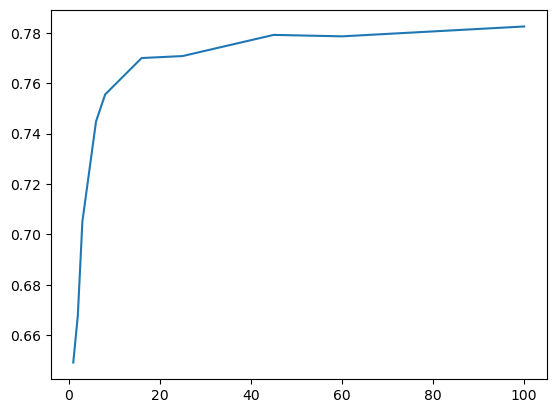

In [53]:
import matplotlib.pyplot as plt
plt.plot(lrr,lis)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=600)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=600)

In [42]:
model = clf.fit(X1_train,y1_train)

In [44]:
f1_score(y1_test, model.predict(X1_test), average = 'macro')

0.7831852988199222

In [26]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1 = f1_score(y_test, y_pred, average = 'macro')
f1

0.7926505069261447

In [54]:
clf.score(X_test,y_test)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


0.8793837421447395

In [55]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
#scores = cross_val_score(clf, X, Y, cv=kf)

In [56]:
#scores = cross_val_score(clf, X, Y, cv=kf)

In [57]:
#scores

In [58]:
Y.shape

(73995,)

pd.read_csv('twitter_validation')